In [4]:
!pip install transformers[sentencepiece] datasets sacrebleu rouge_score py7zr -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.0/104.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━

In [5]:
!pip install evaluate -q
from datasets import load_dataset
from evaluate import evaluator
import pandas as pd
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

import pandas as pd
import numpy as np

import nltk
from nltk.tokenize import sent_tokenize

nltk.download("punkt")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.4 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
import nltk
from nltk.tokenize import sent_tokenize

nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

# T5


In [7]:
sample_text2 =  """BACKGROUND
micrornas  are a class of small non-coding rnas that regulate gene expression by binding to their target mrnas and triggering either protein translation repression or rna degradation  <cit> . recent studies show that some mirnas are located at fragile sites and genomic regions involved in cancers  <cit> . the aberrant expression of mirna genes could lead to human disease, including cancer  <cit> , and are regarded as potential biomarkers for cancer diagnosis  <cit> . the roles mirnas play have been demonstrated in a few cancer types including breast cancer  <cit> , lung cancer  <cit>  and chronic lymphocytic leukemia  <cit> , while the roles of mirna in other cancers remain largely unknown.

there are several approaches of studying mirnas and their expression profiles, including northern blotting and real-time pcr assay. there are also available high-throughput methods such as oligonucleotide mirna microarray analysis  <cit> , bead-based flow-cytometric technique  <cit> , and sage-based mirage  <cit> . mirna microarray analysis is a commonly used high-throughput technique for the assessment of previously discovered mirnas. with the sage-based technique, such as mirage, the expression profiles of known mirnas could be retrieved together with the unknown ones which are possible mirna candidates.

for gene expression sage studies  <cit> , there exist several well developed methods for data analysis together with web services provided, such as sagemap  <cit>  and sage genie  <cit> . for mirna-related sage, however, the data analysis is much more complicated. the extracted tags have to be compared with various rna databases in addition to mrna sequences. the tags also need to be mapped to the human genome and to be analyzed for precursors with thermodynamically stable hairpin structures. this is a very troublesome process and current users have to refer to several different databases to retrieve related biologically significant data  <cit> . to aid the processing and data analysis of this method, we constructed a web-based system, named mirna analysis system . the expression profile of known mirnas in submitted sequences were returned and compared with public dataset using fisher's exact test. public available datasets of known mirnas expression in liver were collected for the annotation of mirna expression in liver. several public available gene expression datasets were included to reveal differentially expressed genes in liver cancer and normal liver tissues. the differentially expressed mirnas and genes are highlighted and the relationship between mirnas and genes is shown according to mirna target prediction.

RESULTS
users could upload the raw sequencing data and specify the sequencing parameters through the web interface. the known mirnas and possible mirna candidates will be analyzed together with their expression profiles. the target genes predicted by mirna target prediction software are provided together with the annotation information. to demonstrate the biological significance of the retrieved mirnas, the profiles of public datasets of known mirnas and target genes were collected and included in the annotation.

the miras system provides an easy and friendly way for scientists to analyze and process raw mirna sequence data to obtain new mirna candidates. it also provides tools for the annotations of the predicted mirnas.

CONCLUSIONS
in this work, we established a web-based analysis platform for mirnas, called miras  <cit> , to analyze the mirna expression in specific tissue and to predict and study the possible mirna candidates. the differentially expressed mirnas that target differentially expressed genes are retrieved together with mirna and target gene annotation, to uncover the biological significance. currently it supports liver cancer genes, while in the future, the analysis platform is planned to be expanded to support other cancers and to integrate all public available expression data of the mirnas and genes in cancer and normal tissues.
"""

In [ ]:
from transformers import pipeline, set_seed
pipe2 = pipeline('summarization', model = 't5-large', max_length = 450 )

pipe_out2 = pipe2(sample_text2)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.95G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

In [ ]:
pipe_out2

[{'summary_text': 'mirnas are a class of small non-coding rna that regulate gene expression . they are located at fragile sites and genomic regions involved in cancers . aberrant expression of mira genes could lead to human disease, including cancer . the miras system provides an easy and friendly way for scientists to analyze and process raw sequence data . it also provides tools for the annotation of the predicted mira candidates . currently it supports liver cancer genes .'}]

In [ ]:
summaries = {}

In [ ]:
summaries['t5'] = 'n'.join(sent_tokenize(pipe_out2[0]['summary_text']))

# BART-L

In [ ]:
pipe3 = pipeline("summarization", model="facebook/bart-large-cnn")
pipe_out3 = pipe3(sample_text2)

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
pipe_out3

[{'summary_text': 'micrornas are a class of small non-coding rnas that regulate gene expression by binding to their target mrnas and triggering either protein translation repression or rna degradation. mirnas play roles in a few cancer types including breast cancer, lung cancer and chronic lymphocytic leukemia, while the roles of mirna in other cancers remain largely unknown. mirna microarray analysis is a commonly used high-throughput technique for the assessment of previously discovered mirnas.'}]

In [ ]:
summaries["bart"] = "\n".join(sent_tokenize(pipe_out3[0]["summary_text"]))

# PEGASUS

In [ ]:
pipe = pipeline('summarization', model="google/pegasus-large"  )

pipe_out = pipe(sample_text2)

config.json:   0%|          | 0.00/3.09k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-large and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/260 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/88.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

In [ ]:
pipe_out

[{'summary_text': 'there are also available high-throughput methods such as mirnas microarray analysis cit> , bead-based flow-cytometric technique cit> , and sage-based mirage cit> . for gene expression sage studies cit> , there exist several well developed methods for data analysis together with web services provided, such as sagemap cit> and sage genie cit> .'}]

In [ ]:
summaries["pegasus"] = pipe_out[0]["summary_text"].replace(" .<n>", ".\n")

# Bigbird Pegasus

In [ ]:
from transformers import pipeline

pipe_bigbird = pipeline('summarization', model='google/bigbird-pegasus-large-arxiv', tokenizer='google/bigbird-pegasus-large-arxiv')
summary_bigbird = pipe_bigbird(sample_text2, max_length=512, min_length=100, truncation=True)
print(summary_bigbird)

config.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.31G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/232 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.92M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.51M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/775 [00:00<?, ?B/s]

Input ids are automatically padded from 797 to 832 to be a multiple of `config.block_size`: 64


[{'summary_text': 'expression data of micrornas ( mirnas ) are a class of small non -coding rnas that regulate gene expression by binding to their target mrnas and triggering either protein translation repression or rna degradation .<n> recent studies show that some mirnas are located at fragile sites and genomic regions involved in cancers , and are regarded as potential biomarkers for cancer diagnosis . in this work , we established a web - based system , named mirna analysis system , to analyze the expression profiles of known mirnas and to predict and study the possible mirna candidates .<n> the differentially expressed mirnas and genes were retrieved together with mirna and target gene annotation , to uncover the biological significance .<n> public available datasets of known mirnas expression in liver were collected and included in the annotation .'}]


In [ ]:
summary_bigbird[0]["summary_text"]

'expression data of micrornas ( mirnas ) are a class of small non -coding rnas that regulate gene expression by binding to their target mrnas and triggering either protein translation repression or rna degradation .<n> recent studies show that some mirnas are located at fragile sites and genomic regions involved in cancers , and are regarded as potential biomarkers for cancer diagnosis . in this work , we established a web - based system , named mirna analysis system , to analyze the expression profiles of known mirnas and to predict and study the possible mirna candidates .<n> the differentially expressed mirnas and genes were retrieved together with mirna and target gene annotation , to uncover the biological significance .<n> public available datasets of known mirnas expression in liver were collected and included in the annotation .'

In [ ]:
summaries["bigbird"] = summary_bigbird[0]["summary_text"].replace(" .<n>", ".\n")

In [ ]:
summaries

{'t5': 'mirnas are a class of small non-coding rna that regulate gene expression .nthey are located at fragile sites and genomic regions involved in cancers .naberrant expression of mira genes could lead to human disease, including cancer .nthe miras system provides an easy and friendly way for scientists to analyze and process raw sequence data .nit also provides tools for the annotation of the predicted mira candidates .ncurrently it supports liver cancer genes .',
 'bart': 'micrornas are a class of small non-coding rnas that regulate gene expression by binding to their target mrnas and triggering either protein translation repression or rna degradation.\nmirnas play roles in a few cancer types including breast cancer, lung cancer and chronic lymphocytic leukemia, while the roles of mirna in other cancers remain largely unknown.\nmirna microarray analysis is a commonly used high-throughput technique for the assessment of previously discovered mirnas.',
 'pegasus': 'there are also ava

In [3]:
summ1 ='''recent studies revealed that mirnas play as important regulators of gene expression and some even as cancer players or inhibitors.
we introduce a web-based analysis platform called mirna analysis system , for processing and analyzing of the sequence data obtained from the total rna clone method.
finally, to extract the biological significance of the mirnas in the samples, further annotations of the known mirna and target genes were performed by collecting the public expression datasets of mirna and target genes in normal and cancer tissues.
the functions of known and predicted mirnas were then analyzed by mirna target prediction followed by target gene annotations.
with miras, mirnas and possible mirna candidates contained in the submitted sequencing data were obtained together with their expression profile.
many studies try to discover new mirnas and reveal the mirna expression profile in cancer using a sage-based total rna clone method.
'''

# Longformer Encoder Decoder

In [ ]:
from transformers import pipeline

pipe_led = pipeline('summarization', model='allenai/led-base-16384', tokenizer='allenai/led-base-16384')
summary_led = pipe_led(sample_text2, max_length=512, min_length=100, truncation=True)
print(summary_led)

config.json:   0%|          | 0.00/1.09k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/648M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/168 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/27.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Input ids are automatically padded from 804 to 1024 to be a multiple of `config.attention_window`: 1024


[{'summary_text': 'BACKGROUND: mirna is a class of small non-coding rnas that regulate gene expression by binding to their target mrnas and triggering either protein translation repression or rna degradation  <cit> . recent studies show that some mirnas are located at fragile sites and genomic regions involved in cancers  <cit> . the aberrant expression of mirna genes could lead to human disease, including cancer  <cit> , and are regarded as potential biomarkers for cancer diagnosis  <cit> . the roles mirnas play have been demonstrated in a few cancer types including breast cancer  <cit> , lung cancer  <cit>  and chronic lymphocytic leukemia  <cit> , while the roles of mirna in other cancers remain largely unknown. mirna is a class of small non-coding rnas that regulate gene expression in cancer  <cit> , and are regarded as potential biomarkers for cancer diagnosis  <cit> . mirnas are also known to be involved in a few cancer types including breast cancer  <cit> , lung cancer  <cit>  a

In [ ]:
summaries["LFED"] = summary_led[0]["summary_text"].replace(" .<n>", ".\n")

# FLAN-T5

In [ ]:
from transformers import pipeline

pipe_flan_t5 = pipeline('summarization', model='google/flan-t5-large', tokenizer='google/flan-t5-large')
summary_flan_t5 = pipe_flan_t5(sample_text2, max_length=150, min_length=50, truncation=True)
print(summary_flan_t5)

model.safetensors:   6%|6         | 189M/3.13G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'summary_text': 'BACKGROUND Micrornas are a class of small non-coding rnas that regulate gene expression by binding to their target mrnas and triggering either protein translation repression or rna degradation . Recent studies show that some mirnas are located at fragile sites and genomic regions involved in cancers cit> .'}]


In [ ]:
summaries["flan-t5"] = summary_flan_t5[0]["summary_text"].replace(" .<n>", ".\n")

# BigBird-PubMed

In [ ]:
from transformers import pipeline

# Initialize the summarization pipeline with the BigBird-Pegasus model fine-tuned for PubMed
pipe_bigbird_pegasus = pipeline('summarization', model='google/bigbird-pegasus-large-pubmed', tokenizer='google/bigbird-pegasus-large-pubmed')

summary_bigbird_pegasus = pipe_bigbird_pegasus(sample_text2, max_length=200, min_length=50, truncation=True)
print(summary_bigbird_pegasus)

config.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.31G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/232 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.92M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.51M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/775 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'summary_text': 'micrornas ( mirnas ) are a class of small noncoding rnas that regulate gene expression by binding to their target mrnas and triggering either protein translation repression or rna degradation cit>. there are several approaches of studying mirnas and their expression profiles , including northern blotting and real - time pcr assay . to aid the processing and data analysis of this method ,<n> we constructed a web - based system , named mirna analysis system ( http://www.miras.org.cn ) .<n> the expression profile of known mirnas in submitted sequences were returned and compared with public dataset using fishers exact test .<n> several public available gene expression datasets were included to reveal differentially expressed genes in liver cancer and normal liver tissues .<n> the differentially expressed mirnas and genes are highlighted and the relationship between mirnas and genes is shown according to mirna target prediction .'}]


In [ ]:
summaries["BigBird_PubMed"] = summary_bigbird_pegasus[0]["summary_text"].replace(" .<n>", ".\n")

# DistilBART

In [ ]:
from transformers import pipeline

pipe_distilbart = pipeline(
    'summarization',
    model='sshleifer/distilbart-cnn-12-6',
    tokenizer='sshleifer/distilbart-cnn-12-6'
)

summary_distilbart = pipe_distilbart(sample_text2, max_length=200, min_length=50, truncation=True)
print(summary_distilbart)

config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'summary_text': ' mirna is a class of small non-coding rnas that regulate gene expression by binding to their target mrnas and triggering protein translation repression or rna degradation . Recent studies show that some mirnas are located at fragile sites and genomic regions involved in cancers . The roles of mirnas play in a few cancer types including breast cancer, lung cancer and chronic lymphocytic leukemia .'}]


# ROUGE-SCORE

In [7]:
!pip install evaluate -q
!pip install rouge_score -q

from evaluate import load
import pandas as pd

In [12]:

rouge_metric = load("rouge")
reference = summ1

rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]
records = []

# Evaluate each model's summary
for model_name, summary in summaries.items():
    # Compute ROUGE scores
    score = rouge_metric.compute(predictions=[summary], references=[reference])

    # Extract ROUGE scores
    rouge_dict = {rn: score.get(rn, 0.0) for rn in rouge_names}
    print(f"ROUGE scores for {model_name}: {rouge_dict}")

    rouge_dict["model_name"] = model_name
    records.append(rouge_dict)

# Convert results to a DataFrame
results_df = pd.DataFrame.from_records(records).set_index("model_name")
print("\nROUGE Scores DataFrame:")
print(results_df)

ROUGE scores for T5: {'rouge1': 0.15384615384615385, 'rouge2': 0.010362694300518133, 'rougeL': 0.11282051282051282, 'rougeLsum': 0.12307692307692307}
ROUGE scores for BART: {'rouge1': 0.27272727272727276, 'rouge2': 0.027522935779816515, 'rougeL': 0.14545454545454545, 'rougeLsum': 0.2363636363636364}
ROUGE scores for PEGASUS: {'rouge1': 0.19148936170212766, 'rouge2': 0.02150537634408602, 'rougeL': 0.13829787234042554, 'rougeLsum': 0.18085106382978725}
ROUGE scores for BigBird: {'rouge1': 0.5239852398523985, 'rouge2': 0.1486988847583643, 'rougeL': 0.25830258302583026, 'rougeLsum': 0.4354243542435425}
ROUGE scores for LFED: {'rouge1': 0.30919765166340507, 'rouge2': 0.03929273084479371, 'rougeL': 0.14481409001956946, 'rougeLsum': 0.24266144814090015}
ROUGE scores for FLAN-T5: {'rouge1': 0.18556701030927833, 'rouge2': 0.020833333333333332, 'rougeL': 0.10309278350515465, 'rougeLsum': 0.1134020618556701}
ROUGE scores for BigBird_PubMed: {'rouge1': 0.48056537102473496, 'rouge2': 0.120996441281

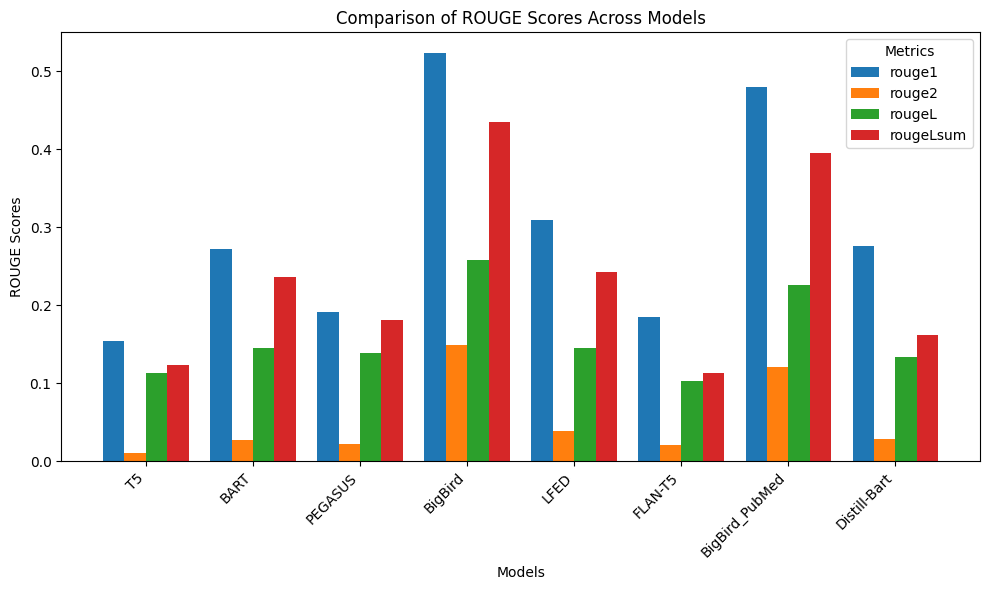

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


metrics = ["rouge1", "rouge2", "rougeL", "rougeLsum"]
x = np.arange(len(results_df.index))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
for i, metric in enumerate(metrics):
    ax.bar(x + i * width, results_df[metric], width, label=metric)

ax.set_xlabel("Models")
ax.set_ylabel("ROUGE Scores")
ax.set_title("Comparison of ROUGE Scores Across Models")
ax.set_xticks(x + width * (len(metrics) - 1) / 2)
ax.set_xticklabels(results_df.index, rotation=45, ha='right')
ax.legend(title="Metrics")
plt.tight_layout()

plt.show()

In [15]:
df

,rouge1,rouge2,rougeL,rougeLsum
model_name,,,,
T5,0.153846,0.010363,0.112821,0.123077
BART,0.272727,0.027523,0.145455,0.236364
PEGASUS,0.191489,0.021505,0.138298,0.180851
BigBird,0.523985,0.148699,0.258303,0.435424
LFED,0.309198,0.039293,0.144814,0.242661
FLAN-T5,0.185567,0.020833,0.103093,0.113402
BigBird_PubMed,0.480565,0.120996,0.226148,0.395760
Distill-Bart,0.276190,0.028846,0.133333,0.161905


# BERT Score and METEOR Score

In [13]:
!pip install bert_score -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.5 MB/s eta 0:00:00


In [22]:
from evaluate import load

# Load metrics
metrics = {
    "meteor": load("meteor"),
    "bertscore": load("bertscore")
}

reference = summ1
results = {}

# Compute metrics for each model
for model_name, summary in summaries.items():
    results[model_name] = {}
    for metric_name, metric in metrics.items():

        if metric_name == "bertscore":
            score = metric.compute(predictions=[summary], references=[reference], lang="en")
        else:
            score = metric.compute(predictions=[summary], references=[reference])
        results[model_name][metric_name] = score

# Print the results
for model_name, scores in results.items():
    print(f"Evaluation results for {model_name}:")
    for metric_name, score in scores.items():
        print(f"  {metric_name}: {score}")


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Evaluation results for T5:
  meteor: {'meteor': 0.07271468144044323}
  bertscore: {'precision': [0.8444373607635498], 'recall': [0.8379566669464111], 'f1': [0.8411844968795776], 'hashcode': 'roberta-large_L17_no-idf_version=0.3.12(hug_trans=4.46.3)'}
Evaluation results for BART:
  meteor: {'meteor': 0.13936097892590074}
  bertscore: {'precision': [0.8432663083076477], 'recall': [0.8401512503623962], 'f1': [0.8417059183120728], 'hashcode': 'roberta-large_L17_no-idf_version=0.3.12(hug_trans=4.46.3)'}
Evaluation results for PEGASUS:
  meteor: {'meteor': 0.09034051424600419}
  bertscore: {'precision': [0.8544028997421265], 'recall': [0.8282797336578369], 'f1': [0.841138482093811], 'hashcode': 'roberta-large_L17_no-idf_version=0.3.12(hug_trans=4.46.3)'}
Evaluation results for BigBird:
  meteor: {'meteor': 0.36371637887634684}
  bertscore: {'precision': [0.8720203042030334], 'recall': [0.8806480765342712], 'f1': [0.8763129711151123], 'hashcode': 'roberta-large_L17_no-idf_version=0.3.12(hug_t

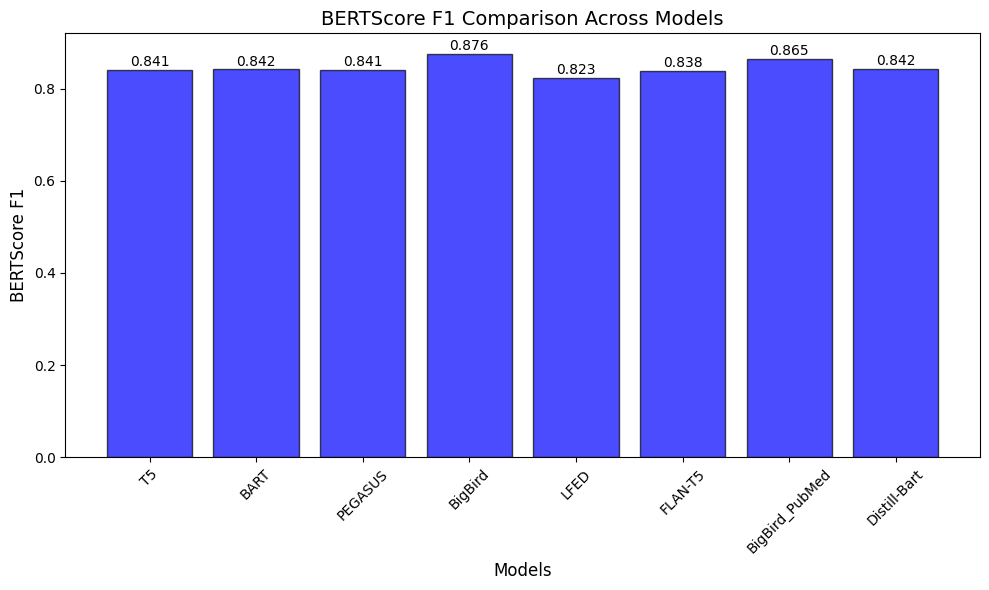

In [21]:
import matplotlib.pyplot as plt

models = ["T5", "BART", "PEGASUS", "BigBird", "LFED", "FLAN-T5", "BigBird_PubMed", "Distill-Bart"]
bertscore_f1 = [0.8412, 0.8417, 0.8411, 0.8763, 0.8226, 0.8383, 0.8654, 0.8424]

plt.figure(figsize=(10, 6))
plt.bar(models, bertscore_f1, color='blue', edgecolor='black', alpha=0.7)

plt.xlabel("Models", fontsize=12)
plt.ylabel("BERTScore F1", fontsize=12)
plt.title("BERTScore F1 Comparison Across Models", fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

for i, score in enumerate(bertscore_f1):
    plt.text(i, score + 0.002, f"{score:.3f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

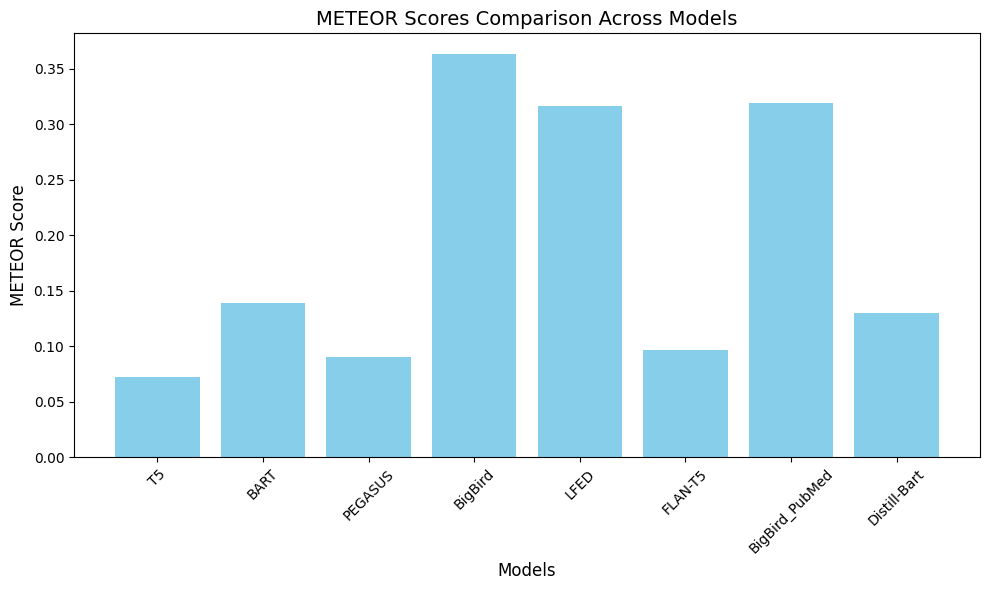

In [23]:
import matplotlib.pyplot as plt

# METEOR scores for each model
models = ['T5', 'BART', 'PEGASUS', 'BigBird', 'LFED', 'FLAN-T5', 'BigBird_PubMed', 'Distill-Bart']
meteor_scores = [0.0727, 0.1394, 0.0903, 0.3637, 0.3160, 0.0965, 0.3191, 0.1300]

plt.figure(figsize=(10, 6))
plt.bar(models, meteor_scores, color='skyblue')

plt.title('METEOR Scores Comparison Across Models', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('METEOR Score', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [10]:
summaries2 = {'BigBird': 'expression data of micrornas ( mirnas ) are a class of small non -coding rnas that regulate gene expression by binding to their target mrnas and triggering either protein translation repression or rna degradation.\n recent studies show that some mirnas are located at fragile sites and genomic regions involved in cancers , and are regarded as potential biomarkers for cancer diagnosis . in this work , we established a web - based system , named mirna analysis system , to analyze the expression profiles of known mirnas and to predict and study the possible mirna candidates.\n the differentially expressed mirnas and genes were retrieved together with mirna and target gene annotation , to uncover the biological significance.\n public available datasets of known mirnas expression in liver were collected and included in the annotation .',
 'Fine-Tuned Model1': 'expression data of micrornas ( mirnas ) are a class of small non-coding rnas that regulate gene expression by binding to their target mrnas and triggering either protein translation repression or rna degradation cit>. the differentially expressed mirnas and genes are retrieved together with mirna and target gene annotation , to uncover the biological significance . in this work , we established a web - based system , named mirna analysis system , to analyze the expression profiles of known mirnas and to predict and study the possible mirna candidates . the differentially expressed mirnas and genes are retrieved together with mirna and target gene annotation , to uncover the biological significance . the known mirnas and possible mirna candidates will be analyzed together with their expression profiles . to aid the processing and data analysis of this method , we constructed a web - based system , named mirna analysis system . the expression profile of known mirnas in submitted sequences were returned and compared with public dataset using fisher s exact test. it also provides tools for the annotations of the predicted mirna candidates .',
 'Fine-Tuned Model2': 'expression data of micrornas ( mirnas ) are a class of small non -coding rnas that regulate gene expression by binding to their target mrnas and triggering either protein translation repression or rna degradation .<n> recent studies show that some mirnas are located at fragile sites and genomic regions involved in cancers , and are regarded as potential biomarkers for cancer diagnosis . in this work , we established a web - based system , named mirna analysis system , to analyze the expression profiles of known mirnas and to predict and study the possible mirna candidates .<n> the differentially expressed mirnas and genes were retrieved together with mirna and target gene annotation to uncover the biological significance . to aid the processing and data analysis of the retrieved mirna sequences , the profiles of known mirnas and target genes were collected and included in the annotation miras system .'
  }

In [11]:
from evaluate import load
import pandas as pd

rouge_metric = load("rouge")
reference = summ1

rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]
records = []

# Evaluate each model's summary
for model_name, summary in summaries2.items():
    # Compute ROUGE scores
    score = rouge_metric.compute(predictions=[summary], references=[reference])

    # Extract ROUGE scores
    rouge_dict = {rn: score.get(rn, 0.0) for rn in rouge_names}
    print(f"ROUGE scores for {model_name}: {rouge_dict}")

    rouge_dict["model_name"] = model_name
    records.append(rouge_dict)

results_df = pd.DataFrame.from_records(records).set_index("model_name")
print("\nROUGE Scores DataFrame:")
print(results_df)

ROUGE scores for BigBird: {'rouge1': 0.5239852398523985, 'rouge2': 0.1486988847583643, 'rougeL': 0.25830258302583026, 'rougeLsum': 0.4354243542435425}
ROUGE scores for Fine-Tuned Model1: {'rouge1': 0.5408805031446541, 'rouge2': 0.17088607594936708, 'rougeL': 0.2641509433962264, 'rougeLsum': 0.40251572327044016}
ROUGE scores for Fine-Tuned Model2: {'rouge1': 0.5454545454545454, 'rouge2': 0.1619718309859155, 'rougeL': 0.2517482517482517, 'rougeLsum': 0.40559440559440557}

ROUGE Scores DataFrame:
                     rouge1    rouge2    rougeL  rougeLsum
model_name                                                
BigBird            0.523985  0.148699  0.258303   0.435424
Fine-Tuned Model1  0.540881  0.170886  0.264151   0.402516
Fine-Tuned Model2  0.545455  0.161972  0.251748   0.405594


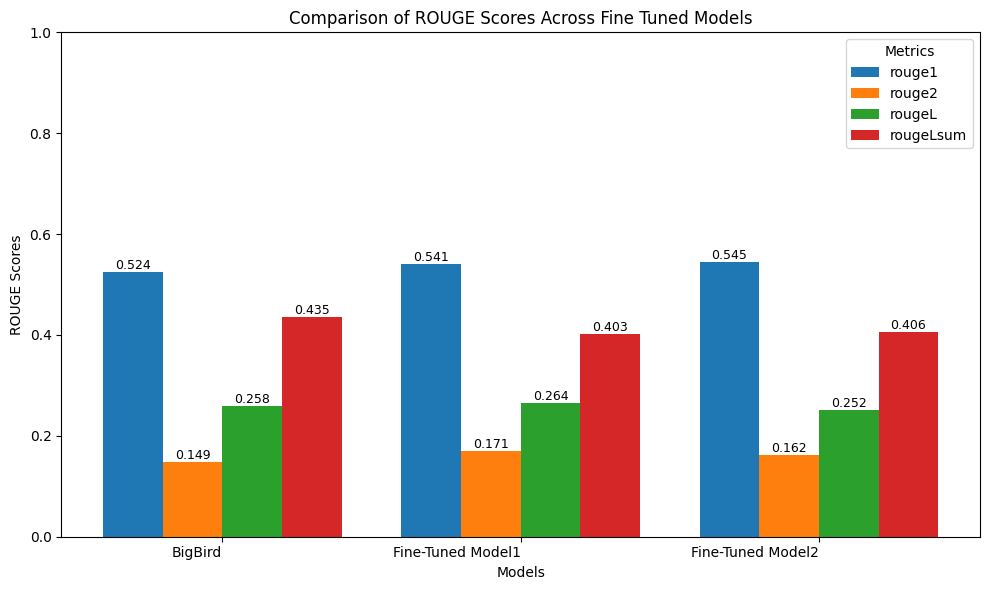

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

metrics = ["rouge1", "rouge2", "rougeL", "rougeLsum"]
x = np.arange(len(results_df.index))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
for i, metric in enumerate(metrics):
    bars = ax.bar(x + i * width, results_df[metric], width, label=metric)

    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.3f}', ha='center', va='bottom', fontsize=9)

ax.set_xlabel("Models")
ax.set_ylabel("ROUGE Scores")
ax.set_title("Comparison of ROUGE Scores Across Fine Tuned Models")
ax.set_xticks(x + width * (len(metrics) - 1) / 2)
ax.set_xticklabels(results_df.index, ha='right')
ax.set_ylim(0, 1)
ax.legend(title="Metrics")
plt.tight_layout()

plt.show()


In [14]:
from evaluate import load

# Load metrics
metrics = {
    "meteor": load("meteor"),
    "bertscore": load("bertscore")
}


reference = summ1
results = {}

# Compute metrics for each model
for model_name, summary in summaries2.items():
    results[model_name] = {}
    for metric_name, metric in metrics.items():

        if metric_name == "bertscore":
            score = metric.compute(predictions=[summary], references=[reference], lang="en")
        else:
            score = metric.compute(predictions=[summary], references=[reference])
        results[model_name][metric_name] = score

for model_name, scores in results.items():
    print(f"Evaluation results for {model_name}:")
    for metric_name, score in scores.items():
        print(f"  {metric_name}: {score}")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Evaluation results for BigBird:
  meteor: {'meteor': 0.36371637887634684}
  bertscore: {'precision': [0.8720203042030334], 'recall': [0.8806480765342712], 'f1': [0.8763129711151123], 'hashcode': 'roberta-large_L17_no-idf_version=0.3.12(hug_trans=4.46.3)'}
Evaluation results for Fine-Tuned Model1:
  meteor: {'meteor': 0.4125313183289853}
  bertscore: {'precision': [0.8667801022529602], 'recall': [0.8741610646247864], 'f1': [0.8704549074172974], 'hashcode': 'roberta-large_L17_no-idf_version=0.3.12(hug_trans=4.46.3)'}
Evaluation results for Fine-Tuned Model2:
  meteor: {'meteor': 0.353756673329014}
  bertscore: {'precision': [0.8596027493476868], 'recall': [0.8789153099060059], 'f1': [0.869151771068573], 'hashcode': 'roberta-large_L17_no-idf_version=0.3.12(hug_trans=4.46.3)'}


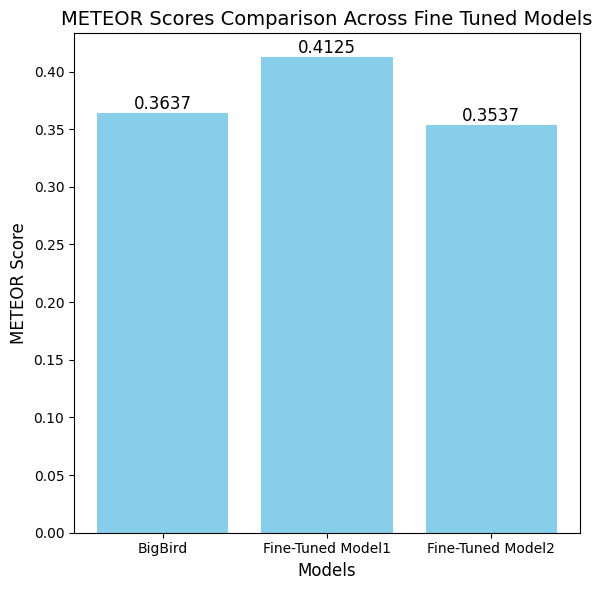

In [24]:
import matplotlib.pyplot as plt

# METEOR scores for each model
models = ['BigBird', 'Fine-Tuned Model1', 'Fine-Tuned Model2']
meteor_scores = [0.3637, 0.4125, 0.3537]

plt.figure(figsize=(6, 6))
bars = plt.bar(models, meteor_scores, color='skyblue')

plt.title('METEOR Scores Comparison Across Fine Tuned Models', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('METEOR Score', fontsize=12)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.4f}', ha='center', va='bottom', fontsize=12)

plt.xticks()
plt.tight_layout()
plt.show()